*Parte 2 de 4*
#### Ingeniero en Sistemas: Erick J. Pineda Amézquita  
Correo de contacto: epineda.amezquita@gmail.com  
github: https://github.com/epinedaWorks/


# Analizando datos financieros desde la nube

Contenido: 
+ Cargar datos remotamente desde APIS

La fuente de datos para los siguientes ejemplos se obtendrá desde:  
https://iexcloud.io/  

Es necesario crear una cuenta. Mas detalles en:  
https://www.youtube.com/watch?v=M7Ge0zi0oS4  

Ejemplo:  
https://www.palmislandtraders.com/econ136/iexcloud.html


+ 1 - The base URL 'https://cloud.iexapis.com/
+ 2 - The word "/stable/" or "/beta/" (use stable for default)
+ 3 - The code for historical data, including symbol and duration, stock/aapl/chart/1y (or 2y,5y etc).
+ 4 - The question mark followed by your token, ?token="your public key"'  

This approach reads the contents of a JSON file into a pandas dataframe using pd.read_json

**Paso 1:**  

Instalar Pandas Data Reader:  

Ya sea en la linea de comandos de un sistema operativo tipo \*nix o en una consola de Windows en modo Admnistrador, ejecutar:     
 
**\$ pip install pandas-datareader**  

**Paso 2:**  
Obtener token desde la plataforma de Iex, en este caso:  
pk_e0d3c388825a402dba4850e4ba01c21d


**Paso 3:**  
Agregar la llave como una variable de entorno. Ejecutar la instrucción desde el notebook:  
os.environ["IEX_API_KEY"] = "pk_e0d3c388825a402dba4850e4ba01c21d" 


In [3]:
import os
os.environ["IEX_API_KEY"] = "pk_e0d3c388825a402dba4850e4ba01c21d" 


In [10]:
from pandas_datareader.data import DataReader
from datetime import datetime
from datetime import date # Date & time functionality

#Liberías básicas
import pandas as pd
import matplotlib.pyplot as plt


En este ejemplo, se va a realizar la carga de datos de dos maneras.  
+ 1. Por medio de json
+ 2. Por medio de dataframes para Python  

**TOMAR EN CUENTA QUE EL CÓDIGO ESCRITO SI FUNCIONA, PUEDE DAR PROBLEMAS LA LICENCIA CON IEX YA QUE LA DE PRUEBAS PERMITE HACER UN NÚMERO LIMITADO DE CONSULTAS.  
EN ESTE MOMENTO ME ACABÉ MI CUOTA, PERO PUDE COMPROBAR QUE EL CÓDIGO ES FUNCIONAL EN AMBAS VÍAS**

### Por medio de Json
Se utiliza el token directamente

In [18]:
sym = "AAPL"  # This is not case-sensitive
token = "pk_e0d3c388825a402dba4850e4ba01c21d"
dfMiStock = pd.read_json('https://cloud.iexapis.com/stable/stock/'+sym+'/chart/1y?token='+token+'')

dfMiStock.head(4)

HTTPError: HTTP Error 402: Payment Required

### Por medio de dataFrames de Python
El token se utiliza de forma implicita, ya que al estar definida como variable de entorno, según lo indicado en las instrucciones iniciales, asi es como lo interpreta.  
Si no se carga como variable de entorno muestra error.

In [17]:
ticker = 'FB'
data_source = 'iex'
start = date(2016, 1, 1)
end = date(2016, 12, 31)

stock_prices = DataReader(ticker, data_source, start, end)
print("Type: ",type(stock_prices))
print("Shape: ",stock_prices.shape)

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=FB&types=chart&range=5y&token=pk_e0d3c388825a402dba4850e4ba01c21d
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

Crear una serie a partir del dataframe "stock_prices" para luego graficarla con PyPlot

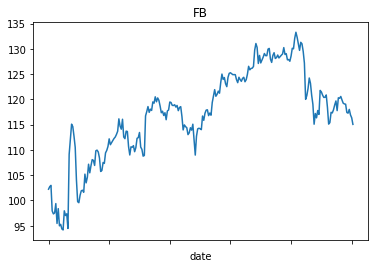

In [22]:
stock_prices['close'].plot(title=ticker)

# Show the plot
plt.show()

In [ ]:
# Set start date
start = date(1968,1,1)

# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()